In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

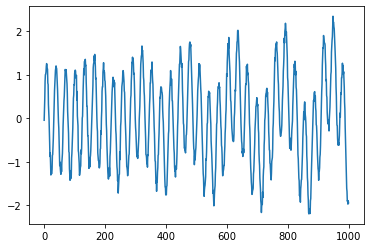

In [2]:
time_series_length = 1000
t = np.linspace(0, 40, time_series_length)
ts = t * np.cos(t) / 7 + 6 * np.sin(t*5) + 0.4 * np.random.standard_normal(size=time_series_length)
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(ts_norm)

In [3]:
train_size = int(len(ts) * 0.7)
test_size = len(ts) - train_size
train, test = ts_norm[0:train_size], ts_norm[train_size:len(ts)]

In [4]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps)]
        x.append(a)
        y.append(dataset[i+time_steps])
    return np.array(x), np.array(y)

In [5]:
n_time_steps = 10

x_train, y_train = create_dataset(train, n_time_steps)
x_test, y_test = create_dataset(test, n_time_steps)
n_inputs = 1

x_train = np.reshape(x_train, (x_train.shape[0], n_time_steps, n_inputs))
x_test = np.reshape(x_test, (x_test.shape[0], n_time_steps, n_inputs))

In [6]:
model =  keras.Sequential()
model.add(layers.LSTM(100, input_shape=(n_time_steps, n_inputs), return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
22/22 - 3s - loss: 0.5729 - 3s/epoch - 159ms/step
Epoch 2/10
22/22 - 0s - loss: 0.1736 - 177ms/epoch - 8ms/step
Epoch 3/10
22/22 - 0s - loss: 0.0388 - 183ms/epoch - 8ms/step
Epoch 4/10
22/22 - 0s - loss: 0.0282 - 180ms/epoch - 8ms/step
Epoch 5/10
22/22 - 0s - loss: 0.0260 - 186ms/epoch - 8ms/step
Epoch 6/10
22/22 - 0s - loss: 0.0266 - 180ms/epoch - 8ms/step
Epoch 7/10
22/22 - 0s - loss: 0.0255 - 182ms/epoch - 8ms/step
Epoch 8/10
22/22 - 0s - loss: 0.0257 - 188ms/epoch - 9ms/step
Epoch 9/10
22/22 - 0s - loss: 0.0228 - 185ms/epoch - 8ms/step
Epoch 10/10
22/22 - 0s - loss: 0.0218 - 198ms/epoch - 9ms/step


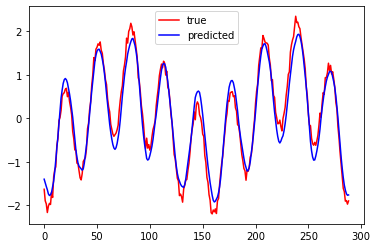

In [8]:
y_pred = model.predict(x_test)
plt.plot(y_test, 'r', label = 'true')
plt.plot(y_pred, 'b', label = 'predicted')
plt.legend()

In [9]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [11]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [12]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 31s 65ms/step - loss: 0.4426 - accuracy: 0.8450 - val_loss: 0.3781 - val_accuracy: 0.8648
Epoch 2/10
469/469 [==============================] - 38s 80ms/step - loss: 0.2920 - accuracy: 0.8960 - val_loss: 0.3160 - val_accuracy: 0.8833
Epoch 3/10
469/469 [==============================] - 37s 79ms/step - loss: 0.2443 - accuracy: 0.9105 - val_loss: 0.2850 - val_accuracy: 0.8956
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 0.2102 - accuracy: 0.9241 - val_loss: 0.2864 - val_accuracy: 0.8929
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.1823 - accuracy: 0.9335 - val_loss: 0.2741 - val_accuracy: 0.9021
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1595 - accuracy: 0.9423 - val_loss: 0.2674 - val_accuracy: 0.9047
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.1374 - accuracy: 0.9509 - val_loss: 0.2812 - val_accuracy:

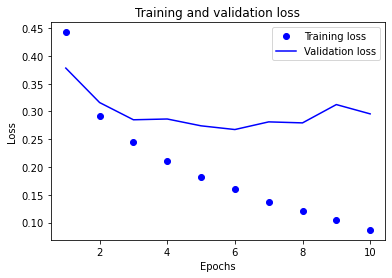

In [13]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import argparse

In [18]:
df = pd.read_csv("D:/Labs/diabetes.csv",sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))
scaledColums.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
x = df
y = pd.DataFrame(df['Outcome'],columns=['Outcome'])
x.shape

(768, 9)

In [32]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)
yTrain = pd.get_dummies(data=yTrain,columns =['Outcome'])
yTest = pd.get_dummies(data=yTest,columns =['Outcome'])

In [33]:
model_nn = keras.Sequential([keras.layers.Dense(15,kernel_initializer = 'he_uniform',input_shape=(9,),activation = 'relu'),
                            keras.layers.Dense(25,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(20,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(2,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'),
                            ])

es = EarlyStopping(patience=5,restore_best_weights= True)

model_nn.compile(loss = "binary_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 10,callbacks = es)

Epoch 1/10
17/17 [==============================] - 1s 24ms/step - loss: 9.6192 - accuracy: 0.5350 - val_loss: 3.8004 - val_accuracy: 0.6142
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 3.3790 - accuracy: 0.6187 - val_loss: 2.0129 - val_accuracy: 0.5709
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 2.0595 - accuracy: 0.5117 - val_loss: 1.6655 - val_accuracy: 0.6142
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 1.7232 - accuracy: 0.5156 - val_loss: 1.4947 - val_accuracy: 0.6142
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 1.4693 - accuracy: 0.5584 - val_loss: 1.3757 - val_accuracy: 0.6181
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 1.3448 - accuracy: 0.5759 - val_loss: 1.4662 - val_accuracy: 0.5472
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 1.3775 - accuracy: 0.5700 - val_loss: 1.3134 - val_accuracy: 0.5709
Epoch 8/10
17/17 [=

In [35]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)
print("test_accuracy:",test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 0.9719 - accuracy: 0.6102
test_accuracy: 0.6102362275123596


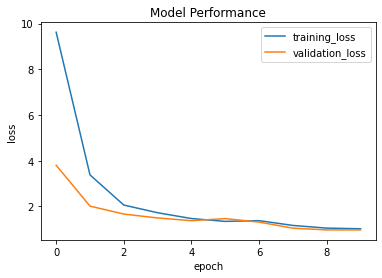

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()